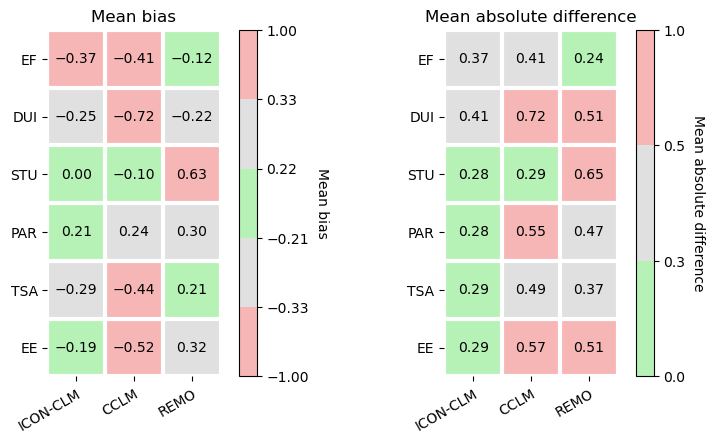

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import BoundaryNorm, ListedColormap


def heatmap(
    data, row_labels, col_labels, ax=None, cbar_kw=None, cbarlabel="", **kwargs
):
    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap (IMPORTANT: include norm if provided)
    im = ax.imshow(data, **kwargs)

    # Create colorbar that sticks to bounds
    if "norm" in kwargs:
        norm = kwargs["norm"]
        if "boundaries" not in cbar_kw:
            cbar_kw["boundaries"] = norm.boundaries
        if "ticks" not in cbar_kw:
            cbar_kw["ticks"] = norm.boundaries

    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(
        range(data.shape[1]),
        labels=col_labels,
        rotation=30,
        ha="right",
        rotation_mode="anchor",
    )
    ax.set_yticks(range(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=False, bottom=True, labeltop=False, labelbottom=True)

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1] + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0] + 1) - 0.5, minor=True)
    ax.grid(which="minor", color="w", linestyle="-", linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(
    im,
    data=None,
    valfmt="{x:.2f}",
    textcolors=("black", "white"),
    threshold=None,
    **textkw,
):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max()) / 2.0

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center", verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts


fig, ax = plt.subplots(figsize=(10, 4.5), nrows=1, ncols=2)

MB = np.array(
    [
        [-0.37, -0.41, -0.12],
        [-0.25, -0.72, -0.22],
        [0.00, -0.10, 0.63],
        [0.21, 0.24, 0.30],
        [-0.29, -0.44, 0.21],
        [-0.19, -0.52, 0.32],
    ]
)
MAD = np.array(
    [
        [0.37, 0.41, 0.24],
        [0.41, 0.72, 0.51],
        [0.28, 0.29, 0.65],
        [0.28, 0.55, 0.47],
        [0.29, 0.49, 0.37],
        [0.29, 0.57, 0.51],
    ]
)

light_green = "#b6f2b6"
mid_gray = "#e0e0e0"
light_red = "#f7b6b6"
cmap = ListedColormap([light_red, mid_gray, light_green, mid_gray, light_red])
bounds = [-1, -0.33, -0.21, 0.22, 0.33, 1.0]
norm = BoundaryNorm(bounds, cmap.N)
row_labels = ["EF", "DUI", "STU", "PAR", "TSA", "EE"]
col_labels = [
    "ICON-CLM",
    "CCLM",
    "REMO",
]
# Add a colorbar
im, cbar = heatmap(
    MB,
    row_labels=row_labels,
    col_labels=col_labels,
    ax=ax[0],
    cmap=cmap,
    norm=norm,
    cbarlabel="Mean bias",
)
texts = annotate_heatmap(im, valfmt="{x:.2f}")
ax[0].title.set_text("Mean bias")

cmap = ListedColormap([light_green, mid_gray, light_red])
bounds = [0, 0.3, 0.5, 1.0]
norm = BoundaryNorm(bounds, cmap.N)
# Add a colorbar
im, cbar = heatmap(
    MAD,
    row_labels=row_labels,
    col_labels=col_labels,
    ax=ax[1],
    cmap=cmap,
    norm=norm,
    cbarlabel="Mean absolute difference",
)
texts = annotate_heatmap(im, valfmt="{x:.2f}")
ax[1].title.set_text("Mean absolute difference")
plt.subplots_adjust(wspace=0.05)
plt.show()

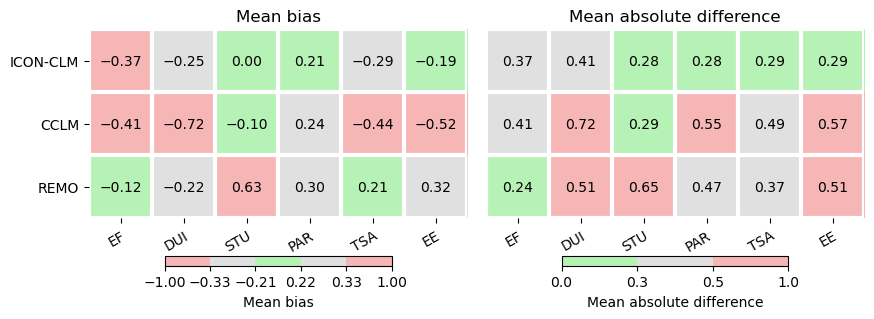

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import BoundaryNorm, ListedColormap


def heatmap(
    data, row_labels, col_labels, ax=None, cbar_kw=None, cbarlabel="", **kwargs
):
    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    im = ax.imshow(data, **kwargs)

    # Create colorbar that sticks to bounds
    if "norm" in kwargs:
        norm = kwargs["norm"]
        if "boundaries" not in cbar_kw:
            cbar_kw["boundaries"] = norm.boundaries
        if "ticks" not in cbar_kw:
            cbar_kw["ticks"] = norm.boundaries

    # Create a horizontal colorbar under the subplot
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes

    cax = inset_axes(
        ax,
        width="60%",
        height="5%",
        loc="lower center",
        bbox_to_anchor=(0, -0.25, 1, 1),
        bbox_transform=ax.transAxes,
        borderpad=0,
    )

    cbar = ax.figure.colorbar(im, cax=cax, orientation="horizontal")
    cbar.ax.set_xlabel(cbarlabel)

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(
        range(data.shape[1]),
        labels=col_labels,
        rotation=30,
        ha="right",
        rotation_mode="anchor",
    )
    ax.set_yticks(range(data.shape[0]), labels=row_labels)

    ax.tick_params(top=False, bottom=True, labeltop=False, labelbottom=True)

    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1] + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0] + 1) - 0.5, minor=True)
    ax.grid(which="minor", color="w", linestyle="-", linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(
    im,
    data=None,
    valfmt="{x:.2f}",
    textcolors=("black", "white"),
    threshold=None,
    **textkw,
):
    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max()) / 2.0

    kw = dict(horizontalalignment="center", verticalalignment="center")
    kw.update(textkw)

    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts


# -------------------------
# Data
# -------------------------

MB = np.array(
    [
        [-0.37, -0.41, -0.12],
        [-0.25, -0.72, -0.22],
        [0.00, -0.10, 0.63],
        [0.21, 0.24, 0.30],
        [-0.29, -0.44, 0.21],
        [-0.19, -0.52, 0.32],
    ]
)
MAD = np.array(
    [
        [0.37, 0.41, 0.24],
        [0.41, 0.72, 0.51],
        [0.28, 0.29, 0.65],
        [0.28, 0.55, 0.47],
        [0.29, 0.49, 0.37],
        [0.29, 0.57, 0.51],
    ]
)

row_labels = ["EF", "DUI", "STU", "PAR", "TSA", "EE"]
col_labels = ["ICON-CLM", "CCLM", "REMO"]

# -------------------------
# Swap rows and columns
# -------------------------

MB = MB.T
MAD = MAD.T

row_labels_swapped = col_labels
col_labels_swapped = row_labels

# -------------------------
# Plotting
# -------------------------

fig, ax = plt.subplots(figsize=(10, 4.5), nrows=1, ncols=2)

# Mean Bias heatmap
light_green = "#b6f2b6"
mid_gray = "#e0e0e0"
light_red = "#f7b6b6"
cmap = ListedColormap([light_red, mid_gray, light_green, mid_gray, light_red])
bounds = [-1, -0.33, -0.21, 0.22, 0.33, 1.0]
norm = BoundaryNorm(bounds, cmap.N)

im, cbar = heatmap(
    MB,
    row_labels=row_labels_swapped,
    col_labels=col_labels_swapped,
    ax=ax[0],
    cmap=cmap,
    norm=norm,
    cbarlabel="Mean bias",
)
annotate_heatmap(im, valfmt="{x:.2f}")
ax[0].set_title("Mean bias")

# MAD heatmap
cmap = ListedColormap([light_green, mid_gray, light_red])
bounds = [0, 0.3, 0.5, 1.0]
norm = BoundaryNorm(bounds, cmap.N)

im, cbar = heatmap(
    MAD,
    row_labels=row_labels_swapped,
    col_labels=col_labels_swapped,
    ax=ax[1],
    cmap=cmap,
    norm=norm,
    cbarlabel="Mean absolute difference",
)
annotate_heatmap(im, valfmt="{x:.2f}")
ax[1].set_title("Mean absolute difference")
ax[1].set_yticklabels([])
ax[1].set_yticks([])
plt.subplots_adjust(wspace=0.05)
plt.show()


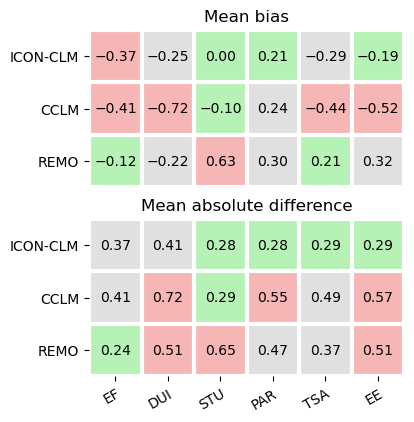

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import BoundaryNorm, ListedColormap


def heatmap(
    data, row_labels, col_labels, ax=None, cbar_kw=None, cbarlabel="", **kwargs
):
    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    im = ax.imshow(data, **kwargs)

    # Create colorbar that sticks to bounds
    if "norm" in kwargs:
        norm = kwargs["norm"]
        if "boundaries" not in cbar_kw:
            cbar_kw["boundaries"] = norm.boundaries
        if "ticks" not in cbar_kw:
            cbar_kw["ticks"] = norm.boundaries

    # Create a horizontal colorbar under the subplot

    #    cax = inset_axes(ax, width="60%", height="5%", loc="lower center",
    #                    bbox_to_anchor=(0, -0.25, 1, 1),
    #                    bbox_transform=ax.transAxes, borderpad=0)

    #    cbar = ax.figure.colorbar(im, cax=cax, orientation="horizontal")
    #    cbar.ax.set_xlabel(cbarlabel)

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(
        range(data.shape[1]),
        labels=col_labels,
        rotation=30,
        ha="right",
        rotation_mode="anchor",
    )
    ax.set_yticks(range(data.shape[0]), labels=row_labels)

    ax.tick_params(top=False, bottom=True, labeltop=False, labelbottom=True)

    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1] + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0] + 1) - 0.5, minor=True)
    ax.grid(which="minor", color="w", linestyle="-", linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im  # , cbar


def annotate_heatmap(
    im,
    data=None,
    valfmt="{x:.2f}",
    textcolors=("black", "white"),
    threshold=None,
    **textkw,
):
    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max()) / 2.0

    kw = dict(horizontalalignment="center", verticalalignment="center")
    kw.update(textkw)

    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts


# -------------------------
# Data
# -------------------------

MB = np.array(
    [
        [-0.37, -0.41, -0.12],
        [-0.25, -0.72, -0.22],
        [0.00, -0.10, 0.63],
        [0.21, 0.24, 0.30],
        [-0.29, -0.44, 0.21],
        [-0.19, -0.52, 0.32],
    ]
)
MAD = np.array(
    [
        [0.37, 0.41, 0.24],
        [0.41, 0.72, 0.51],
        [0.28, 0.29, 0.65],
        [0.28, 0.55, 0.47],
        [0.29, 0.49, 0.37],
        [0.29, 0.57, 0.51],
    ]
)

row_labels = ["EF", "DUI", "STU", "PAR", "TSA", "EE"]
col_labels = ["ICON-CLM", "CCLM", "REMO"]

# -------------------------
# Swap rows and columns
# -------------------------

MB = MB.T
MAD = MAD.T

row_labels_swapped = col_labels
col_labels_swapped = row_labels

# -------------------------
# Plotting
# -------------------------

fig, ax = plt.subplots(figsize=(10, 4.5), nrows=2, ncols=1)

# Mean Bias heatmap
light_green = "#b6f2b6"
mid_gray = "#e0e0e0"
light_red = "#f7b6b6"
cmap = ListedColormap([light_red, mid_gray, light_green, mid_gray, light_red])
bounds = [-1, -0.33, -0.21, 0.22, 0.33, 1.0]
norm = BoundaryNorm(bounds, cmap.N)

im = heatmap(
    MB,
    row_labels=row_labels_swapped,
    col_labels=col_labels_swapped,
    ax=ax[0],
    cmap=cmap,
    norm=norm,
    cbarlabel="Mean bias",
)
annotate_heatmap(im, valfmt="{x:.2f}")
ax[0].set_title("Mean bias")

# MAD heatmap
cmap = ListedColormap([light_green, mid_gray, light_red])
bounds = [0, 0.3, 0.5, 1.0]
norm = BoundaryNorm(bounds, cmap.N)

im = heatmap(
    MAD,
    row_labels=row_labels_swapped,
    col_labels=col_labels_swapped,
    ax=ax[1],
    cmap=cmap,
    norm=norm,
    cbarlabel="Mean absolute difference",
)
annotate_heatmap(im, valfmt="{x:.2f}")
ax[1].set_title("Mean absolute difference")
# ax[1].set_yticklabels([])
# ax[1].set_yticks([])
ax[0].set_xticklabels([])
ax[0].tick_params(top=False, bottom=False, labeltop=False, labelbottom=True)
plt.savefig(
    "/work/bb1203/g260190_heinrich/Dunkelflaute/Analysis_Scripts/Publikation/NUKLEUS_base_reference_paper/monthly_mean_temperature.pdf",
    bbox_inches="tight",
    format="pdf",
    dpi=300,
)
plt.show()


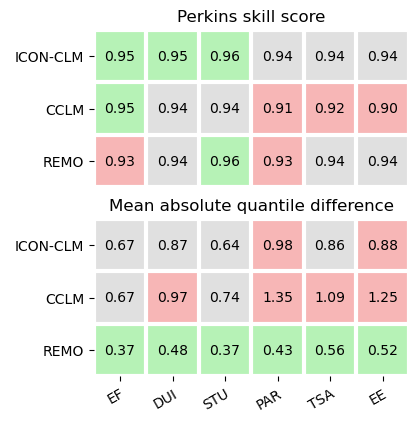

In [20]:
# PSS and MAQD for TMAX
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import BoundaryNorm, ListedColormap


def heatmap(
    data, row_labels, col_labels, ax=None, cbar_kw=None, cbarlabel="", **kwargs
):
    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    im = ax.imshow(data, **kwargs)

    # Create colorbar that sticks to bounds
    if "norm" in kwargs:
        norm = kwargs["norm"]
        if "boundaries" not in cbar_kw:
            cbar_kw["boundaries"] = norm.boundaries
        if "ticks" not in cbar_kw:
            cbar_kw["ticks"] = norm.boundaries

    # Create a horizontal colorbar under the subplot

    #    cax = inset_axes(ax, width="60%", height="5%", loc="lower center",
    #                    bbox_to_anchor=(0, -0.25, 1, 1),
    #                    bbox_transform=ax.transAxes, borderpad=0)

    #    cbar = ax.figure.colorbar(im, cax=cax, orientation="horizontal")
    #    cbar.ax.set_xlabel(cbarlabel)

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(
        range(data.shape[1]),
        labels=col_labels,
        rotation=30,
        ha="right",
        rotation_mode="anchor",
    )
    ax.set_yticks(range(data.shape[0]), labels=row_labels)

    ax.tick_params(top=False, bottom=True, labeltop=False, labelbottom=True)

    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1] + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0] + 1) - 0.5, minor=True)
    ax.grid(which="minor", color="w", linestyle="-", linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im  # , cbar


def annotate_heatmap(
    im,
    data=None,
    valfmt="{x:.2f}",
    textcolors=("black", "white"),
    threshold=None,
    **textkw,
):
    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max()) / 2.0

    kw = dict(horizontalalignment="center", verticalalignment="center")
    kw.update(textkw)

    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts


# -------------------------
# Data
# -------------------------

arr = np.array(
    [
        [0.95, 0.95, 0.93, 0.67, 0.67, 0.37],
        [0.95, 0.94, 0.94, 0.87, 0.97, 0.48],
        [0.96, 0.94, 0.96, 0.64, 0.74, 0.37],
        [0.94, 0.91, 0.93, 0.98, 1.35, 0.43],
        [0.94, 0.92, 0.94, 0.86, 1.09, 0.56],
        [0.94, 0.90, 0.94, 0.88, 1.25, 0.52],
    ]
)
PSS = arr[:, :3]
MAQD = arr[:, 3:]

row_labels = ["EF", "DUI", "STU", "PAR", "TSA", "EE"]
col_labels = ["ICON-CLM", "CCLM", "REMO"]

# -------------------------
# Swap rows and columns
# -------------------------

PSS = PSS.T
MAQD = MAQD.T

row_labels_swapped = col_labels
col_labels_swapped = row_labels

# -------------------------
# Plotting
# -------------------------

fig, ax = plt.subplots(figsize=(10, 4.5), nrows=2, ncols=1)

# Mean Bias heatmap
light_green = "#b6f2b6"
mid_gray = "#e0e0e0"
light_red = "#f7b6b6"
cmap = ListedColormap([light_red, mid_gray, light_green])
bounds = [0, 0.94, 0.95, 1.0]
norm = BoundaryNorm(bounds, cmap.N)

im = heatmap(
    PSS,
    row_labels=row_labels_swapped,
    col_labels=col_labels_swapped,
    ax=ax[0],
    cmap=cmap,
    norm=norm,
    cbarlabel="Perkins skill score",
)
annotate_heatmap(im, valfmt="{x:.2f}")
ax[0].set_title("Perkins skill score")

# MAD heatmap
cmap = ListedColormap([light_green, mid_gray, light_red])
bounds = [0, 0.64, 0.88, 1.0]
norm = BoundaryNorm(bounds, cmap.N)

im = heatmap(
    MAQD,
    row_labels=row_labels_swapped,
    col_labels=col_labels_swapped,
    ax=ax[1],
    cmap=cmap,
    norm=norm,
    cbarlabel="Mean absolute quantile difference",
)
annotate_heatmap(im, valfmt="{x:.2f}")
ax[1].set_title("Mean absolute quantile difference")
# ax[1].set_yticklabels([])
# ax[1].set_yticks([])
ax[0].set_xticklabels([])
ax[0].tick_params(top=False, bottom=False, labeltop=False, labelbottom=True)

ax[0].text(
    0.5,
    0.5,
    "Created by Philipp Heinrich\nhttps://orcid.org/0009-0005-8887-3141",
    fontsize=10,
    alpha=0.0,
    ha="center",
    va="center",
)

plt.savefig(
    "/work/bb1203/g260190_heinrich/Dunkelflaute/Analysis_Scripts/Publikation/NUKLEUS_base_reference_paper/daily_max_temperature.pdf",
    bbox_inches="tight",
    format="pdf",
    dpi=300,
)
plt.show()


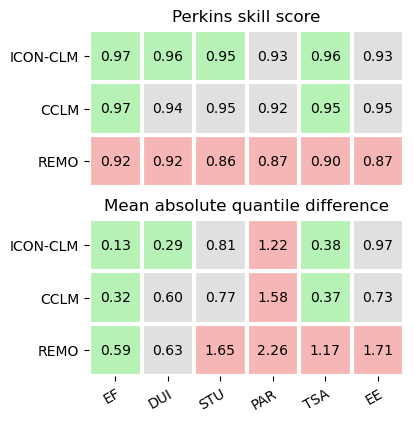

[[0.96722477 0.955082   0.95047955 0.9330601  0.95658955 0.93210364]
 [0.96687611 0.9442638  0.94814973 0.92451901 0.95279909 0.94994823]
 [0.9200906  0.91751255 0.86217586 0.87304727 0.89812225 0.87266759]]
[[0.13 0.29 0.81 1.22 0.38 0.97]
 [0.32 0.6  0.77 1.58 0.37 0.73]
 [0.59 0.63 1.65 2.26 1.17 1.71]]
True
True


In [21]:
# PSS and MAQD for TMIN
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import BoundaryNorm, ListedColormap


def heatmap(
    data, row_labels, col_labels, ax=None, cbar_kw=None, cbarlabel="", **kwargs
):
    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    im = ax.imshow(data, **kwargs)

    # Create colorbar that sticks to bounds
    if "norm" in kwargs:
        norm = kwargs["norm"]
        if "boundaries" not in cbar_kw:
            cbar_kw["boundaries"] = norm.boundaries
        if "ticks" not in cbar_kw:
            cbar_kw["ticks"] = norm.boundaries

    # Create a horizontal colorbar under the subplot

    #    cax = inset_axes(ax, width="60%", height="5%", loc="lower center",
    #                    bbox_to_anchor=(0, -0.25, 1, 1),
    #                    bbox_transform=ax.transAxes, borderpad=0)

    #    cbar = ax.figure.colorbar(im, cax=cax, orientation="horizontal")
    #    cbar.ax.set_xlabel(cbarlabel)

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(
        range(data.shape[1]),
        labels=col_labels,
        rotation=30,
        ha="right",
        rotation_mode="anchor",
    )
    ax.set_yticks(range(data.shape[0]), labels=row_labels)

    ax.tick_params(top=False, bottom=True, labeltop=False, labelbottom=True)

    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1] + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0] + 1) - 0.5, minor=True)
    ax.grid(which="minor", color="w", linestyle="-", linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im  # , cbar


def annotate_heatmap(
    im,
    data=None,
    valfmt="{x:.2f}",
    textcolors=("black", "white"),
    threshold=None,
    **textkw,
):
    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max()) / 2.0

    kw = dict(horizontalalignment="center", verticalalignment="center")
    kw.update(textkw)

    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts


# -------------------------
# Data
# -------------------------

arr = np.array(
    [
        [0.97, 0.97, 0.92, 0.13, 0.32, 0.59],
        [0.96, 0.94, 0.92, 0.29, 0.60, 0.63],
        [0.95, 0.95, 0.86, 0.81, 0.77, 1.65],
        [0.93, 0.92, 0.87, 1.22, 1.58, 2.26],
        [0.96, 0.95, 0.90, 0.38, 0.37, 1.17],
        [0.93, 0.95, 0.87, 0.97, 0.73, 1.71],
    ]
)
PSS = arr[:, :3]
MAQD = arr[:, 3:]

row_labels = ["EF", "DUI", "STU", "PAR", "TSA", "EE"]
col_labels = ["ICON-CLM", "CCLM", "REMO"]

# -------------------------
# Swap rows and columns
# -------------------------

PSS = PSS.T
MAQD = MAQD.T

PSS2 = np.array(
    [
        [0.967224768, 0.955081995, 0.950479551, 0.933060104, 0.956589546, 0.93210364],
        [0.966876114, 0.944263798, 0.948149725, 0.924519013, 0.952799093, 0.949948229],
        [0.920090604, 0.91751255, 0.86217586, 0.873047274, 0.89812225, 0.872667592],
    ]
)
PSS = PSS2
MAQD2 = np.array(
    [
        [0.13, 0.29, 0.81, 1.22, 0.38, 0.97],
        [0.32, 0.6, 0.77, 1.58, 0.37, 0.73],
        [0.59, 0.63, 1.65, 2.26, 1.17, 1.71],
    ]
)
row_labels_swapped = col_labels
col_labels_swapped = row_labels

# -------------------------
# Plotting
# -------------------------

fig, ax = plt.subplots(figsize=(10, 4.5), nrows=2, ncols=1)

# Mean Bias heatmap
light_green = "#b6f2b6"
mid_gray = "#e0e0e0"
light_red = "#f7b6b6"
cmap = ListedColormap([light_red, mid_gray, light_green])
flat = PSS.flatten()
t1, t2 = np.quantile(flat, [1 / 3, 2 / 3])
bounds = [flat.min(), t1, t2, flat.max()]
# bounds = [0, 0.93, 0.95, 1.0]
norm = BoundaryNorm(bounds, cmap.N)

im = heatmap(
    PSS,
    row_labels=row_labels_swapped,
    col_labels=col_labels_swapped,
    ax=ax[0],
    cmap=cmap,
    norm=norm,
    cbarlabel="Perkins skill score",
)
annotate_heatmap(im, valfmt="{x:.2f}")
ax[0].set_title("Perkins skill score")

# MAD heatmap
cmap = ListedColormap([light_green, mid_gray, light_red])
# bounds = [0, 0.63, 0.82, 1.0]
flat = MAQD.flatten()
t1, t2 = np.quantile(flat, [1 / 3, 2 / 3])

# BoundaryNorm requires len(bounds) = ncolors + 1
# You have 5 colors → need 6 bounds
bounds = [flat.min(), t1, t2, flat.max()]
norm = BoundaryNorm(bounds, cmap.N)

im = heatmap(
    MAQD,
    row_labels=row_labels_swapped,
    col_labels=col_labels_swapped,
    ax=ax[1],
    cmap=cmap,
    norm=norm,
    cbarlabel="Mean absolute quantile difference",
)
annotate_heatmap(im, valfmt="{x:.2f}")
ax[1].set_title("Mean absolute quantile difference")
# ax[1].set_yticklabels([])
# ax[1].set_yticks([])
ax[0].set_xticklabels([])
ax[0].tick_params(top=False, bottom=False, labeltop=False, labelbottom=True)
plt.savefig(
    "/work/bb1203/g260190_heinrich/Dunkelflaute/Analysis_Scripts/Publikation/NUKLEUS_base_reference_paper/daily_min_temperature.pdf",
    bbox_inches="tight",
    format="pdf",
    dpi=300,
)
plt.show()

print(PSS)
print(MAQD)
print(np.array_equal(PSS, PSS2))
print(np.array_equal(MAQD, MAQD2))

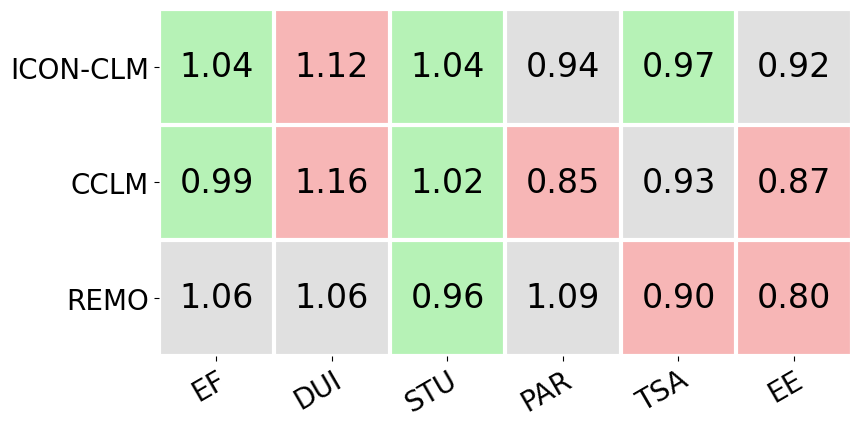

In [22]:
# Ratio of the diurnal temperature range in 2 m height (RDTR, unit K) for June and July of the period 2005–2014.
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import BoundaryNorm, ListedColormap


def heatmap(
    data, row_labels, col_labels, ax=None, cbar_kw=None, cbarlabel="", **kwargs
):
    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    im = ax.imshow(data, **kwargs)

    # Create colorbar that sticks to bounds
    if "norm" in kwargs:
        norm = kwargs["norm"]
        if "boundaries" not in cbar_kw:
            cbar_kw["boundaries"] = norm.boundaries
        if "ticks" not in cbar_kw:
            cbar_kw["ticks"] = norm.boundaries

    # Create a horizontal colorbar under the subplot

    #    cax = inset_axes(ax, width="60%", height="5%", loc="lower center",
    #                    bbox_to_anchor=(0, -0.25, 1, 1),
    #                    bbox_transform=ax.transAxes, borderpad=0)

    #    cbar = ax.figure.colorbar(im, cax=cax, orientation="horizontal")
    #    cbar.ax.set_xlabel(cbarlabel)

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(
        range(data.shape[1]),
        labels=col_labels,
        rotation=30,
        ha="right",
        rotation_mode="anchor",
        fontsize=20,
    )
    ax.set_yticks(range(data.shape[0]), labels=row_labels, fontsize=20)

    ax.tick_params(top=False, bottom=True, labeltop=False, labelbottom=True)

    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1] + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0] + 1) - 0.5, minor=True)
    ax.grid(which="minor", color="w", linestyle="-", linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im  # , cbar


def annotate_heatmap(
    im,
    data=None,
    valfmt="{x:.2f}",
    textcolors=("black", "white"),
    threshold=None,
    **textkw,
):
    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max()) / 2.0

    kw = dict(horizontalalignment="center", verticalalignment="center", fontsize=24)
    kw.update(textkw)

    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts


# -------------------------
# Data
# -------------------------

data = np.array(
    [
        [1.04, 0.99, 1.06],
        [1.12, 1.16, 1.06],
        [1.04, 1.02, 0.96],
        [0.94, 0.85, 1.09],
        [0.97, 0.93, 0.90],
        [0.92, 0.87, 0.80],
    ]
)
row_labels = ["EF", "DUI", "STU", "PAR", "TSA", "EE"]
col_labels = ["ICON-CLM", "CCLM", "REMO"]

# -------------------------
# Swap rows and columns
# -------------------------

data = data.T

row_labels_swapped = col_labels
col_labels_swapped = row_labels

# -------------------------
# Plotting
# -------------------------

fig, ax = plt.subplots(figsize=(10, 4.5), nrows=1, ncols=1)

# Mean Bias heatmap
light_green = "#b6f2b6"
mid_gray = "#e0e0e0"
light_red = "#f7b6b6"
cmap = ListedColormap([light_red, mid_gray, light_green, mid_gray, light_red])
bounds = [0.9, 0.92, 0.96, 1.05, 1.1, 1.1]
norm = BoundaryNorm(bounds, cmap.N)

im = heatmap(
    data,
    row_labels=row_labels_swapped,
    col_labels=col_labels_swapped,
    ax=ax,
    cmap=cmap,
    norm=norm,
    cbarlabel="Perkins skill score",
)
annotate_heatmap(im, valfmt="{x:.2f}")


# ax[0].set_xticklabels([])
# ax[0].tick_params(top=False, bottom=False, labeltop=False, labelbottom=True)
plt.savefig(
    "/work/bb1203/g260190_heinrich/Dunkelflaute/Analysis_Scripts/Publikation/NUKLEUS_base_reference_paper/diurnal_temperature_range.pdf",
    bbox_inches="tight",
    format="pdf",
    dpi=300,
)
plt.show()


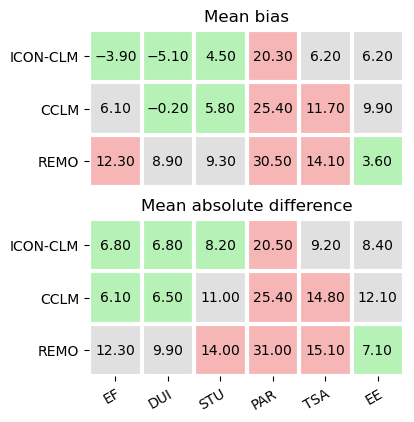

In [23]:
# Mean bias (MB) and mean absolute difference (MAD) of monthly precipitation in mm per month for all pilot regions and simulations.
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import BoundaryNorm, ListedColormap


def heatmap(
    data, row_labels, col_labels, ax=None, cbar_kw=None, cbarlabel="", **kwargs
):
    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    im = ax.imshow(data, **kwargs)

    # Create colorbar that sticks to bounds
    if "norm" in kwargs:
        norm = kwargs["norm"]
        if "boundaries" not in cbar_kw:
            cbar_kw["boundaries"] = norm.boundaries
        if "ticks" not in cbar_kw:
            cbar_kw["ticks"] = norm.boundaries

    # Create a horizontal colorbar under the subplot

    #    cax = inset_axes(ax, width="60%", height="5%", loc="lower center",
    #                    bbox_to_anchor=(0, -0.25, 1, 1),
    #                    bbox_transform=ax.transAxes, borderpad=0)

    #    cbar = ax.figure.colorbar(im, cax=cax, orientation="horizontal")
    #    cbar.ax.set_xlabel(cbarlabel)

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(
        range(data.shape[1]),
        labels=col_labels,
        rotation=30,
        ha="right",
        rotation_mode="anchor",
    )
    ax.set_yticks(range(data.shape[0]), labels=row_labels)

    ax.tick_params(top=False, bottom=True, labeltop=False, labelbottom=True)

    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1] + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0] + 1) - 0.5, minor=True)
    ax.grid(which="minor", color="w", linestyle="-", linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im  # , cbar


def annotate_heatmap(
    im,
    data=None,
    valfmt="{x:.2f}",
    textcolors=("black", "white"),
    threshold=None,
    **textkw,
):
    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max()) / 2.0

    kw = dict(horizontalalignment="center", verticalalignment="center")
    kw.update(textkw)

    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts


# -------------------------
# Data
# -------------------------

MB = np.array(
    [
        [-3.9, 6.1, 12.3],
        [-5.1, -0.2, 8.9],
        [4.5, 5.8, 9.3],
        [20.3, 25.4, 30.5],
        [6.2, 11.7, 14.1],
        [6.2, 9.9, 3.6],
    ]
)

MAD = np.array(
    [
        [6.8, 6.1, 12.3],
        [6.8, 6.5, 9.9],
        [8.2, 11.0, 14.0],
        [20.5, 25.4, 31.0],
        [9.2, 14.8, 15.1],
        [8.4, 12.1, 7.1],
    ]
)


row_labels = ["EF", "DUI", "STU", "PAR", "TSA", "EE"]
col_labels = ["ICON-CLM", "CCLM", "REMO"]

# -------------------------
# Swap rows and columns
# -------------------------

MB = MB.T
MAD = MAD.T

row_labels_swapped = col_labels
col_labels_swapped = row_labels

# -------------------------
# Plotting
# -------------------------

fig, ax = plt.subplots(figsize=(10, 4.5), nrows=2, ncols=1)

# Mean Bias heatmap
light_green = "#b6f2b6"
mid_gray = "#e0e0e0"
light_red = "#f7b6b6"
cmap = ListedColormap([light_green, mid_gray, light_red])
bounds = [-6, 6, 10, 20]
norm = BoundaryNorm(bounds, cmap.N)

im = heatmap(
    MB,
    row_labels=row_labels_swapped,
    col_labels=col_labels_swapped,
    ax=ax[0],
    cmap=cmap,
    norm=norm,
    cbarlabel="Mean bias",
)
annotate_heatmap(im, valfmt="{x:.2f}")
ax[0].set_title("Mean bias")

# MAD heatmap
cmap = ListedColormap([light_green, mid_gray, light_red])
bounds = [6, 8.3, 12.4, 20]
norm = BoundaryNorm(bounds, cmap.N)

im = heatmap(
    MAD,
    row_labels=row_labels_swapped,
    col_labels=col_labels_swapped,
    ax=ax[1],
    cmap=cmap,
    norm=norm,
    cbarlabel="Mean absolute difference",
)
annotate_heatmap(im, valfmt="{x:.2f}")
ax[1].set_title("Mean absolute difference")
# ax[1].set_yticklabels([])
# ax[1].set_yticks([])
ax[0].set_xticklabels([])
ax[0].tick_params(top=False, bottom=False, labeltop=False, labelbottom=True)
plt.savefig(
    "/work/bb1203/g260190_heinrich/Dunkelflaute/Analysis_Scripts/Publikation/NUKLEUS_base_reference_paper/monthly_mean_precipitation.pdf",
    bbox_inches="tight",
    format="pdf",
    dpi=300,
)
plt.show()


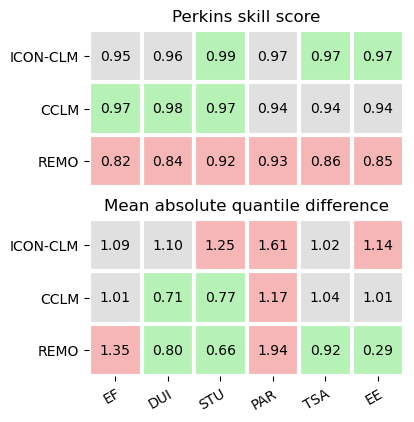

In [24]:
# PSS and MAQD for precipiation
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import BoundaryNorm, ListedColormap


def heatmap(
    data, row_labels, col_labels, ax=None, cbar_kw=None, cbarlabel="", **kwargs
):
    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    im = ax.imshow(data, **kwargs)

    # Create colorbar that sticks to bounds
    if "norm" in kwargs:
        norm = kwargs["norm"]
        if "boundaries" not in cbar_kw:
            cbar_kw["boundaries"] = norm.boundaries
        if "ticks" not in cbar_kw:
            cbar_kw["ticks"] = norm.boundaries

    # Create a horizontal colorbar under the subplot

    #    cax = inset_axes(ax, width="60%", height="5%", loc="lower center",
    #                    bbox_to_anchor=(0, -0.25, 1, 1),
    #                    bbox_transform=ax.transAxes, borderpad=0)

    #    cbar = ax.figure.colorbar(im, cax=cax, orientation="horizontal")
    #    cbar.ax.set_xlabel(cbarlabel)

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(
        range(data.shape[1]),
        labels=col_labels,
        rotation=30,
        ha="right",
        rotation_mode="anchor",
    )
    ax.set_yticks(range(data.shape[0]), labels=row_labels)

    ax.tick_params(top=False, bottom=True, labeltop=False, labelbottom=True)

    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1] + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0] + 1) - 0.5, minor=True)
    ax.grid(which="minor", color="w", linestyle="-", linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im  # , cbar


def annotate_heatmap(
    im,
    data=None,
    valfmt="{x:.2f}",
    textcolors=("black", "white"),
    threshold=None,
    **textkw,
):
    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max()) / 2.0

    kw = dict(horizontalalignment="center", verticalalignment="center")
    kw.update(textkw)

    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts


# -------------------------
# Data
# -------------------------

PSS = np.array(
    [
        [0.95, 0.97, 0.82],
        [0.96, 0.98, 0.84],
        [0.99, 0.97, 0.92],
        [0.97, 0.94, 0.93],
        [0.97, 0.94, 0.86],
        [0.97, 0.94, 0.85],
    ]
)

MAQD = np.array(
    [
        [1.09, 1.01, 1.35],
        [1.10, 0.71, 0.80],
        [1.25, 0.77, 0.66],
        [1.61, 1.17, 1.94],
        [1.02, 1.04, 0.92],
        [1.14, 1.01, 0.29],
    ]
)


row_labels = ["EF", "DUI", "STU", "PAR", "TSA", "EE"]
col_labels = ["ICON-CLM", "CCLM", "REMO"]

# -------------------------
# Swap rows and columns
# -------------------------

PSS = PSS.T
MAQD = MAQD.T

PSS2 = np.array(
    [
        [0.951869262, 0.955602855, 0.987119831, 0.967514135, 0.973511951, 0.971917016],
        [0.973488425, 0.977164693, 0.972583407, 0.937190585, 0.943723185, 0.935898146],
        [0.81966813, 0.839327674, 0.923399027, 0.926117043, 0.858666547, 0.851578867],
    ]
)
PSS = PSS2
row_labels_swapped = col_labels
col_labels_swapped = row_labels

# -------------------------
# Plotting
# -------------------------

fig, ax = plt.subplots(figsize=(10, 4.5), nrows=2, ncols=1)

# Mean Bias heatmap
light_green = "#b6f2b6"
mid_gray = "#e0e0e0"
light_red = "#f7b6b6"
cmap = ListedColormap([light_red, mid_gray, light_green])
flat = PSS.flatten()
t1, t2 = np.quantile(flat, [1 / 3, 2 / 3])

# BoundaryNorm requires len(bounds) = ncolors + 1
# You have 5 colors → need 6 bounds
bounds = [flat.min(), t1, t2, flat.max()]
norm = BoundaryNorm(bounds, cmap.N)

im = heatmap(
    PSS,
    row_labels=row_labels_swapped,
    col_labels=col_labels_swapped,
    ax=ax[0],
    cmap=cmap,
    norm=norm,
    cbarlabel="Perkins skill score",
)
annotate_heatmap(im, valfmt="{x:.2f}")
ax[0].set_title("Perkins skill score")

# MAQD heatmap
cmap = ListedColormap([light_green, mid_gray, light_red])
bounds = [0, 1.01, 1.11, 5]
norm = BoundaryNorm(bounds, cmap.N)

im = heatmap(
    MAQD,
    row_labels=row_labels_swapped,
    col_labels=col_labels_swapped,
    ax=ax[1],
    cmap=cmap,
    norm=norm,
    cbarlabel="Mean absolute quantile difference",
)
annotate_heatmap(im, valfmt="{x:.2f}")
ax[1].set_title("Mean absolute quantile difference")
# ax[1].set_yticklabels([])
# ax[1].set_yticks([])
ax[0].set_xticklabels([])
ax[0].tick_params(top=False, bottom=False, labeltop=False, labelbottom=True)
plt.savefig(
    "/work/bb1203/g260190_heinrich/Dunkelflaute/Analysis_Scripts/Publikation/NUKLEUS_base_reference_paper/daily_precipiation.pdf",
    bbox_inches="tight",
    format="pdf",
    dpi=300,
)
plt.show()


In [25]:
import numpy as np

MAQD = np.array(
    [
        [1.09, 1.01, 1.35],
        [1.10, 0.71, 0.80],
        [1.25, 0.77, 0.66],
        [1.61, 1.17, 1.94],
        [1.02, 1.04, 0.92],
        [1.14, 1.01, 0.29],
    ]
)


# Compute tercile cut points
cuts = np.quantile(MAQD, [1 / 3, 2 / 3])

# Assign each value to a tercile (1, 2, or 3)
groups = np.digitize(MAQD, cuts, right=True)

print(groups.T)


[[1 1 2 2 1 2]
 [1 0 0 2 1 1]
 [2 0 0 2 0 0]]


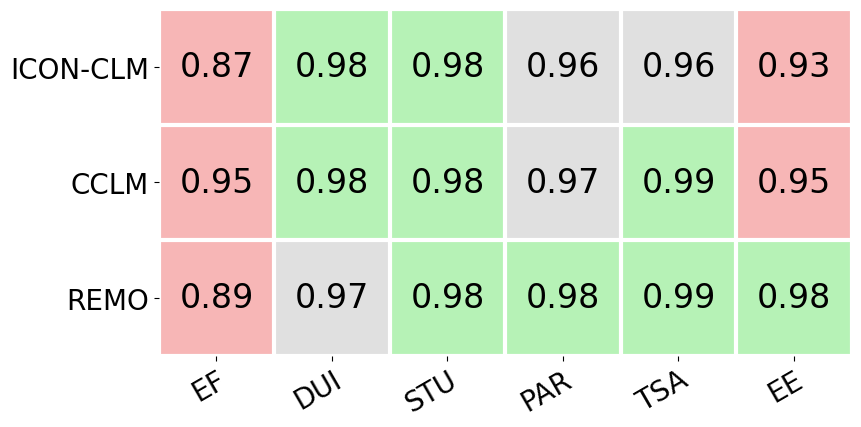

In [26]:
# Rank Correlation Coefficient (RCC, unit 1) for the diurnal cycle of the precipitation.
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import BoundaryNorm, ListedColormap


def heatmap(
    data, row_labels, col_labels, ax=None, cbar_kw=None, cbarlabel="", **kwargs
):
    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    im = ax.imshow(data, **kwargs)

    # Create colorbar that sticks to bounds
    if "norm" in kwargs:
        norm = kwargs["norm"]
        if "boundaries" not in cbar_kw:
            cbar_kw["boundaries"] = norm.boundaries
        if "ticks" not in cbar_kw:
            cbar_kw["ticks"] = norm.boundaries

    # Create a horizontal colorbar under the subplot

    #    cax = inset_axes(ax, width="60%", height="5%", loc="lower center",
    #                    bbox_to_anchor=(0, -0.25, 1, 1),
    #                    bbox_transform=ax.transAxes, borderpad=0)

    #    cbar = ax.figure.colorbar(im, cax=cax, orientation="horizontal")
    #    cbar.ax.set_xlabel(cbarlabel)

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(
        range(data.shape[1]),
        labels=col_labels,
        rotation=30,
        ha="right",
        rotation_mode="anchor",
        fontsize=20,
    )
    ax.set_yticks(range(data.shape[0]), labels=row_labels, fontsize=20)

    ax.tick_params(top=False, bottom=True, labeltop=False, labelbottom=True)

    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1] + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0] + 1) - 0.5, minor=True)
    ax.grid(which="minor", color="w", linestyle="-", linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im  # , cbar


def annotate_heatmap(
    im,
    data=None,
    valfmt="{x:.2f}",
    textcolors=("black", "white"),
    threshold=None,
    **textkw,
):
    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max()) / 2.0

    kw = dict(horizontalalignment="center", verticalalignment="center", fontsize=24)
    kw.update(textkw)

    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts


# -------------------------
# Data
# -------------------------
data = np.array(
    [
        [0.87, 0.95, 0.89],
        [0.98, 0.98, 0.97],
        [0.98, 0.98, 0.98],
        [0.96, 0.97, 0.98],
        [0.96, 0.99, 0.99],
        [0.93, 0.95, 0.98],
    ]
)

row_labels = ["EF", "DUI", "STU", "PAR", "TSA", "EE"]
col_labels = ["ICON-CLM", "CCLM", "REMO"]

# -------------------------
# Swap rows and columns
# -------------------------

data = data.T

row_labels_swapped = col_labels
col_labels_swapped = row_labels

# -------------------------
# Plotting
# -------------------------

fig, ax = plt.subplots(figsize=(10, 4.5), nrows=1, ncols=1)

# Mean Bias heatmap
light_green = "#b6f2b6"
mid_gray = "#e0e0e0"
light_red = "#f7b6b6"
cmap = ListedColormap([light_red, mid_gray, light_green])

flat = data.flatten()
t1, t2 = np.quantile(flat, [1 / 3, 2 / 3])

# BoundaryNorm requires len(bounds) = ncolors + 1
# You have 5 colors → need 6 bounds
bounds = [flat.min(), t1, t2, flat.max()]

norm = BoundaryNorm(bounds, cmap.N)


im = heatmap(
    data,
    row_labels=row_labels_swapped,
    col_labels=col_labels_swapped,
    ax=ax,
    cmap=cmap,
    norm=norm,
    cbarlabel="Perkins skill score",
)
annotate_heatmap(im, valfmt="{x:.2f}")

plt.savefig(
    "/work/bb1203/g260190_heinrich/Dunkelflaute/Analysis_Scripts/Publikation/NUKLEUS_base_reference_paper/diurnal_precipitation.pdf",
    bbox_inches="tight",
    format="pdf",
    dpi=300,
)
plt.show()


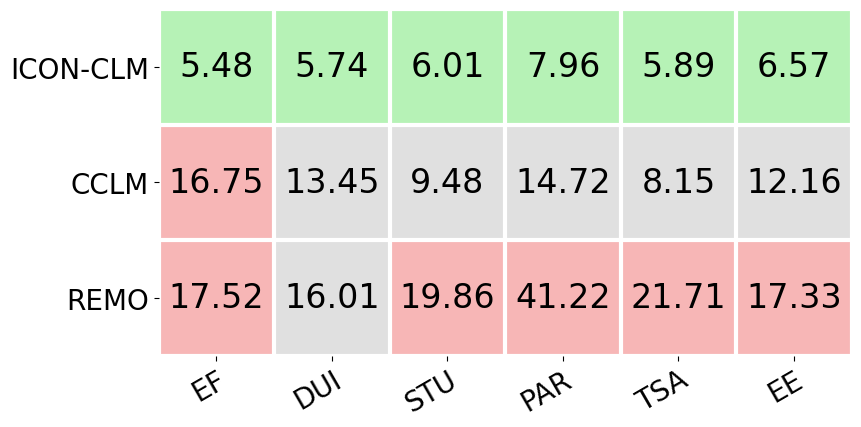

In [27]:
# Mean absolute hourly differences (MAHD, unit \Wsqm) for global radiation with respect to MSG-SARAH3.
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import BoundaryNorm, ListedColormap


def heatmap(
    data, row_labels, col_labels, ax=None, cbar_kw=None, cbarlabel="", **kwargs
):
    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    im = ax.imshow(data, **kwargs)

    # Create colorbar that sticks to bounds
    if "norm" in kwargs:
        norm = kwargs["norm"]
        if "boundaries" not in cbar_kw:
            cbar_kw["boundaries"] = norm.boundaries
        if "ticks" not in cbar_kw:
            cbar_kw["ticks"] = norm.boundaries

    # Create a horizontal colorbar under the subplot

    #    cax = inset_axes(ax, width="60%", height="5%", loc="lower center",
    #                    bbox_to_anchor=(0, -0.25, 1, 1),
    #                    bbox_transform=ax.transAxes, borderpad=0)

    #    cbar = ax.figure.colorbar(im, cax=cax, orientation="horizontal")
    #    cbar.ax.set_xlabel(cbarlabel)

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(
        range(data.shape[1]),
        labels=col_labels,
        rotation=30,
        ha="right",
        rotation_mode="anchor",
        fontsize=20,
    )
    ax.set_yticks(range(data.shape[0]), labels=row_labels, fontsize=20)

    ax.tick_params(top=False, bottom=True, labeltop=False, labelbottom=True)

    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1] + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0] + 1) - 0.5, minor=True)
    ax.grid(which="minor", color="w", linestyle="-", linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im  # , cbar


def annotate_heatmap(
    im,
    data=None,
    valfmt="{x:.2f}",
    textcolors=("black", "white"),
    threshold=None,
    **textkw,
):
    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max()) / 2.0

    kw = dict(horizontalalignment="center", verticalalignment="center", fontsize=24)
    kw.update(textkw)

    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts


# -------------------------
# Data
# -------------------------
data = np.array(
    [
        [5.48, 16.75, 17.52],
        [5.74, 13.45, 16.01],
        [6.01, 9.48, 19.86],
        [7.96, 14.72, 41.22],
        [5.89, 8.15, 21.71],
        [6.57, 12.16, 17.33],
    ]
)

row_labels = ["EF", "DUI", "STU", "PAR", "TSA", "EE"]
col_labels = ["ICON-CLM", "CCLM", "REMO"]

# -------------------------
# Swap rows and columns
# -------------------------

data = data.T

row_labels_swapped = col_labels
col_labels_swapped = row_labels

# -------------------------
# Plotting
# -------------------------

fig, ax = plt.subplots(figsize=(10, 4.5), nrows=1, ncols=1)

# Mean Bias heatmap
light_green = "#b6f2b6"
mid_gray = "#e0e0e0"
light_red = "#f7b6b6"
cmap = ListedColormap([light_green, mid_gray, light_red])

flat = data.flatten()
t1, t2 = np.quantile(flat, [1 / 3, 2 / 3])

# BoundaryNorm requires len(bounds) = ncolors + 1
# You have 5 colors → need 6 bounds
bounds = [flat.min(), t1, t2, flat.max()]
norm = BoundaryNorm(bounds, cmap.N)


im = heatmap(
    data,
    row_labels=row_labels_swapped,
    col_labels=col_labels_swapped,
    ax=ax,
    cmap=cmap,
    norm=norm,
    cbarlabel="Perkins skill score",
)
annotate_heatmap(im, valfmt="{x:.2f}")

plt.savefig(
    "/work/bb1203/g260190_heinrich/Dunkelflaute/Analysis_Scripts/Publikation/NUKLEUS_base_reference_paper/global_radiation_abs_diff.pdf",
    bbox_inches="tight",
    format="pdf",
    dpi=300,
)
plt.show()


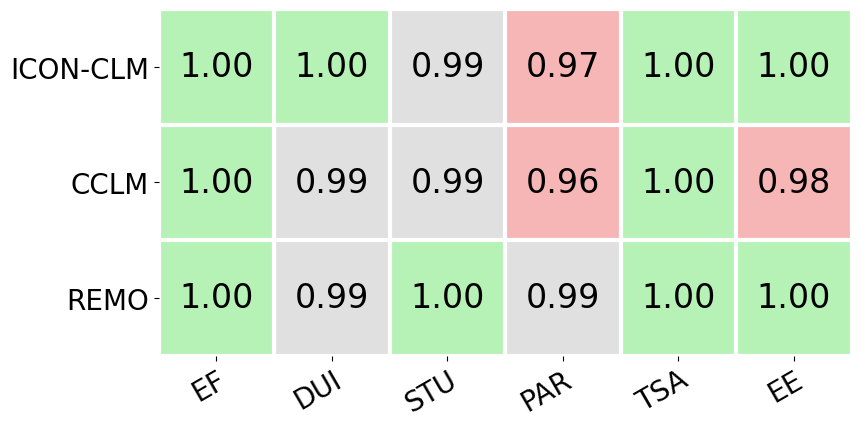

In [28]:
# Rank correlation coefficient (RCC, unit 1) for the diurnal cycle of the 10\,m wind speed.
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import BoundaryNorm, ListedColormap


def heatmap(
    data, row_labels, col_labels, ax=None, cbar_kw=None, cbarlabel="", **kwargs
):
    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    im = ax.imshow(data, **kwargs)

    # Create colorbar that sticks to bounds
    if "norm" in kwargs:
        norm = kwargs["norm"]
        if "boundaries" not in cbar_kw:
            cbar_kw["boundaries"] = norm.boundaries
        if "ticks" not in cbar_kw:
            cbar_kw["ticks"] = norm.boundaries

    # Create a horizontal colorbar under the subplot

    #    cax = inset_axes(ax, width="60%", height="5%", loc="lower center",
    #                    bbox_to_anchor=(0, -0.25, 1, 1),
    #                    bbox_transform=ax.transAxes, borderpad=0)

    #    cbar = ax.figure.colorbar(im, cax=cax, orientation="horizontal")
    #    cbar.ax.set_xlabel(cbarlabel)

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(
        range(data.shape[1]),
        labels=col_labels,
        rotation=30,
        ha="right",
        rotation_mode="anchor",
        fontsize=20,
    )
    ax.set_yticks(range(data.shape[0]), labels=row_labels, fontsize=20)

    ax.tick_params(top=False, bottom=True, labeltop=False, labelbottom=True)

    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1] + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0] + 1) - 0.5, minor=True)
    ax.grid(which="minor", color="w", linestyle="-", linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im  # , cbar


def annotate_heatmap(
    im,
    data=None,
    valfmt="{x:.2f}",
    textcolors=("black", "white"),
    threshold=None,
    **textkw,
):
    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max()) / 2.0

    kw = dict(horizontalalignment="center", verticalalignment="center", fontsize=24)
    kw.update(textkw)

    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts


# -------------------------
# Data
# -------------------------
data = np.array(
    [
        [1.00, 1.00, 1.00],
        [1.00, 0.99, 0.99],
        [0.99, 0.99, 1.00],
        [0.97, 0.96, 0.99],
        [1.00, 1.00, 1.00],
        [1.00, 0.98, 1.00],
    ]
)


row_labels = ["EF", "DUI", "STU", "PAR", "TSA", "EE"]
col_labels = ["ICON-CLM", "CCLM", "REMO"]

# -------------------------
# Swap rows and columns
# -------------------------

data = data.T

row_labels_swapped = col_labels
col_labels_swapped = row_labels

# -------------------------
# Plotting
# -------------------------

fig, ax = plt.subplots(figsize=(10, 4.5), nrows=1, ncols=1)

# Mean Bias heatmap
light_green = "#b6f2b6"
mid_gray = "#e0e0e0"
light_red = "#f7b6b6"
cmap = ListedColormap([light_red, mid_gray, light_green])

flat = data.flatten()
t1, t2 = np.quantile(flat, [1 / 3, 2 / 3])

# BoundaryNorm requires len(bounds) = ncolors + 1
# You have 5 colors → need 6 bounds
bounds = [flat.min(), t1, t2, flat.max()]
norm = BoundaryNorm(bounds, cmap.N)


im = heatmap(
    data,
    row_labels=row_labels_swapped,
    col_labels=col_labels_swapped,
    ax=ax,
    cmap=cmap,
    norm=norm,
    cbarlabel="Perkins skill score",
)
annotate_heatmap(im, valfmt="{x:.2f}")

plt.savefig(
    "/work/bb1203/g260190_heinrich/Dunkelflaute/Analysis_Scripts/Publikation/NUKLEUS_base_reference_paper/diurnal_wind_rcc.pdf",
    bbox_inches="tight",
    format="pdf",
    dpi=300,
)
plt.show()


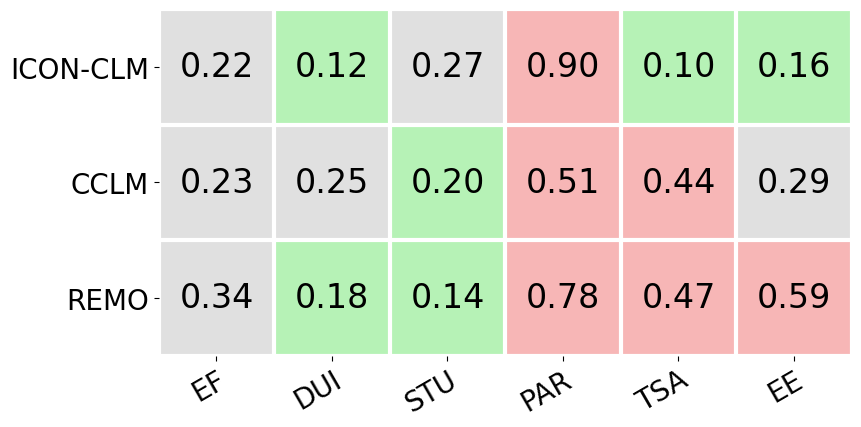

In [33]:
# Mean Absolute Difference (MAD) for the diurnal cycle of the 10\,m wind speed.
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import BoundaryNorm, ListedColormap


def heatmap(
    data, row_labels, col_labels, ax=None, cbar_kw=None, cbarlabel="", **kwargs
):
    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    im = ax.imshow(data, **kwargs)

    # Create colorbar that sticks to bounds
    if "norm" in kwargs:
        norm = kwargs["norm"]
        if "boundaries" not in cbar_kw:
            cbar_kw["boundaries"] = norm.boundaries
        if "ticks" not in cbar_kw:
            cbar_kw["ticks"] = norm.boundaries

    # Create a horizontal colorbar under the subplot

    #    cax = inset_axes(ax, width="60%", height="5%", loc="lower center",
    #                    bbox_to_anchor=(0, -0.25, 1, 1),
    #                    bbox_transform=ax.transAxes, borderpad=0)

    #    cbar = ax.figure.colorbar(im, cax=cax, orientation="horizontal")
    #    cbar.ax.set_xlabel(cbarlabel)

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(
        range(data.shape[1]),
        labels=col_labels,
        rotation=30,
        ha="right",
        rotation_mode="anchor",
        fontsize=20,
    )
    ax.set_yticks(range(data.shape[0]), labels=row_labels, fontsize=20)

    ax.tick_params(top=False, bottom=True, labeltop=False, labelbottom=True)

    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1] + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0] + 1) - 0.5, minor=True)
    ax.grid(which="minor", color="w", linestyle="-", linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im  # , cbar


def annotate_heatmap(
    im,
    data=None,
    valfmt="{x:.2f}",
    textcolors=("black", "white"),
    threshold=None,
    **textkw,
):
    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max()) / 2.0

    kw = dict(horizontalalignment="center", verticalalignment="center", fontsize=24)
    kw.update(textkw)

    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts


# -------------------------
# Data
# -------------------------


data = np.array(
    [
        [0.2233, 0.2342, 0.3399],  # WAKOS_Festland
        [0.1234, 0.2542, 0.1838],  # Duisburg_3x3
        [0.2735, 0.2018, 0.1403],  # ISAP
        [0.8998, 0.5051, 0.7758],  # KARE
        [0.1050, 0.4432, 0.4678],  # KlimaKonform
        [0.1630, 0.2867, 0.5872],  # IAWAK-EE
    ]
)

data = data.T

row_labels = ["EF", "DUI", "STU", "PAR", "TSA", "EE"]
col_labels = ["ICON-CLM", "CCLM", "REMO"]

# -------------------------
# Swap rows and columns
# -------------------------

row_labels_swapped = col_labels
col_labels_swapped = row_labels

# -------------------------
# Plotting
# -------------------------

fig, ax = plt.subplots(figsize=(10, 4.5), nrows=1, ncols=1)

# Mean Bias heatmap
light_green = "#b6f2b6"
mid_gray = "#e0e0e0"
light_red = "#f7b6b6"
cmap = ListedColormap(
    [
        light_green,
        mid_gray,
        light_red,
    ]
)

flat = data.flatten()
t1, t2 = np.quantile(flat, [1 / 3, 2 / 3])

# BoundaryNorm requires len(bounds) = ncolors + 1
# You have 5 colors → need 6 bounds
bounds = [flat.min(), t1, t2, flat.max()]
norm = BoundaryNorm(bounds, cmap.N)


im = heatmap(
    data,
    row_labels=row_labels_swapped,
    col_labels=col_labels_swapped,
    ax=ax,
    cmap=cmap,
    norm=norm,
    cbarlabel="Mean absolute difference",
)
annotate_heatmap(im, valfmt="{x:.2f}")

plt.savefig(
    "/work/bb1203/g260190_heinrich/Dunkelflaute/Analysis_Scripts/Publikation/NUKLEUS_base_reference_paper/diurnal_wind_mad.pdf",
    bbox_inches="tight",
    format="pdf",
    dpi=300,
)
plt.show()


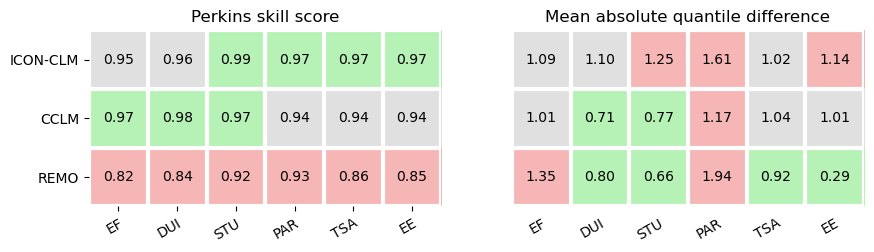

In [30]:
# PSS and MAQD for precipiation
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import BoundaryNorm, ListedColormap


def heatmap(
    data, row_labels, col_labels, ax=None, cbar_kw=None, cbarlabel="", **kwargs
):
    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    im = ax.imshow(data, **kwargs)

    # Create colorbar that sticks to bounds
    if "norm" in kwargs:
        norm = kwargs["norm"]
        if "boundaries" not in cbar_kw:
            cbar_kw["boundaries"] = norm.boundaries
        if "ticks" not in cbar_kw:
            cbar_kw["ticks"] = norm.boundaries

    # Create a horizontal colorbar under the subplot

    #    cax = inset_axes(ax, width="60%", height="5%", loc="lower center",
    #                    bbox_to_anchor=(0, -0.25, 1, 1),
    #                    bbox_transform=ax.transAxes, borderpad=0)

    #    cbar = ax.figure.colorbar(im, cax=cax, orientation="horizontal")
    #    cbar.ax.set_xlabel(cbarlabel)

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(
        range(data.shape[1]),
        labels=col_labels,
        rotation=30,
        ha="right",
        rotation_mode="anchor",
    )
    ax.set_yticks(range(data.shape[0]), labels=row_labels)

    ax.tick_params(top=False, bottom=True, labeltop=False, labelbottom=True)

    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1] + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0] + 1) - 0.5, minor=True)
    ax.grid(which="minor", color="w", linestyle="-", linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im  # , cbar


def annotate_heatmap(
    im,
    data=None,
    valfmt="{x:.2f}",
    textcolors=("black", "white"),
    threshold=None,
    **textkw,
):
    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max()) / 2.0

    kw = dict(horizontalalignment="center", verticalalignment="center")
    kw.update(textkw)

    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts


# -------------------------
# Data
# -------------------------

PSS = np.array(
    [
        [0.95, 0.97, 0.82],
        [0.96, 0.98, 0.84],
        [0.99, 0.97, 0.92],
        [0.97, 0.94, 0.93],
        [0.97, 0.94, 0.86],
        [0.97, 0.94, 0.85],
    ]
)

MAQD = np.array(
    [
        [1.09, 1.01, 1.35],
        [1.10, 0.71, 0.80],
        [1.25, 0.77, 0.66],
        [1.61, 1.17, 1.94],
        [1.02, 1.04, 0.92],
        [1.14, 1.01, 0.29],
    ]
)


row_labels = ["EF", "DUI", "STU", "PAR", "TSA", "EE"]
col_labels = ["ICON-CLM", "CCLM", "REMO"]

# -------------------------
# Swap rows and columns
# -------------------------

PSS = PSS.T
MAQD = MAQD.T

row_labels_swapped = col_labels
col_labels_swapped = row_labels

# -------------------------
# Plotting
# -------------------------

fig, ax = plt.subplots(figsize=(10, 4.5), nrows=1, ncols=2)

# Mean Bias heatmap
light_green = "#b6f2b6"
mid_gray = "#e0e0e0"
light_red = "#f7b6b6"
cmap = ListedColormap([light_red, mid_gray, light_green])
bounds = [0, 0.94, 0.97, 1.0]
norm = BoundaryNorm(bounds, cmap.N)

im = heatmap(
    PSS,
    row_labels=row_labels_swapped,
    col_labels=col_labels_swapped,
    ax=ax[0],
    cmap=cmap,
    norm=norm,
    cbarlabel="Perkins skill score",
)
annotate_heatmap(im, valfmt="{x:.2f}")
ax[0].set_title("Perkins skill score")

# MAQD heatmap
cmap = ListedColormap([light_green, mid_gray, light_red])
bounds = [0, 1.01, 1.11, 5]
norm = BoundaryNorm(bounds, cmap.N)

im = heatmap(
    MAQD,
    row_labels=row_labels_swapped,
    col_labels=col_labels_swapped,
    ax=ax[1],
    cmap=cmap,
    norm=norm,
    cbarlabel="Mean absolute quantile difference",
)
annotate_heatmap(im, valfmt="{x:.2f}")
ax[1].set_title("Mean absolute quantile difference")
# ax[1].set_yticklabels([])
ax[1].set_yticks([])
# ax[0].set_xticklabels([])
ax[1].tick_params(top=False, bottom=False, labeltop=False, labelbottom=True)
# plt.savefig(
#    "/work/bb1203/g260190_heinrich/Dunkelflaute/Analysis_Scripts/Publikation/NUKLEUS_base_reference_paper/daily_precipiation.pdf",
#    bbox_inches="tight",
#    format="pdf",
#    dpi=300,
# )
plt.show()